In [1]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
from pgmpy.inference.CausalInference import CausalInference

import networkx as nx
import pylab as plt

/home/emanuele/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
#################################
# Defining the model structure
#################################
# PP = start Passenger Position
# DP = Destination Position of the passenger
# CP = Cab Position
# onPP = the cab is on the Passenger Position
# onDP = the cab is on the Destination Position

# P = Pickup the passenger
# D = Dropoff the passenger

# inC = passenger is in the Cab
# G = Goal

model = BayesianModel(
    [
        ('PP', 'onPP'),
        ('CP', 'onPP'),
        ('CP', 'onDP'),
        ('DP', 'onDP'),
        ('P', 'inC'),
        ('onPP', 'inC'),
        ('D', 'G'),
        ('inC', 'G'),
        ('onDP', 'G')
    ]
)


# Defining individual CPDs.
cpd_PP = TabularCPD(
    variable='PP', 
    variable_card=25, 
    values=[
        [0.04], [0.04], [0.04], [0.04], [0.04],
        [0.04], [0.04], [0.04], [0.04], [0.04],
        [0.04], [0.04], [0.04], [0.04], [0.04],
        [0.04], [0.04], [0.04], [0.04], [0.04],
        [0.04], [0.04], [0.04], [0.04], [0.04],        
    ])
cpd_DP = TabularCPD(
    variable='DP', 
    variable_card=25, 
    values=[
        [0.04], [0.04], [0.04], [0.04], [0.04],
        [0.04], [0.04], [0.04], [0.04], [0.04],
        [0.04], [0.04], [0.04], [0.04], [0.04],
        [0.04], [0.04], [0.04], [0.04], [0.04],
        [0.04], [0.04], [0.04], [0.04], [0.04],        
    ])
cpd_CP = TabularCPD(
    variable='CP', 
    variable_card=25, 
    values=[
        [0.04], [0.04], [0.04], [0.04], [0.04],
        [0.04], [0.04], [0.04], [0.04], [0.04],
        [0.04], [0.04], [0.04], [0.04], [0.04],
        [0.04], [0.04], [0.04], [0.04], [0.04],
        [0.04], [0.04], [0.04], [0.04], [0.04],        
    ])
cpd_onPP = TabularCPD(
    variable='onPP', 
    variable_card=2, 
    values=[
        [
            1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
            0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        ],
        [
            0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        ]
    ],
    evidence=['PP', 'CP'],
    evidence_card=[25, 25],
    #state_names={'onPP': ['True', 'False']}
)
cpd_onDP = TabularCPD(
    variable='onDP', 
    variable_card=2, 
    values=[
        [
            1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
            0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        ],
        [
            0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        ]
    ],
    evidence=['DP', 'CP'],
    evidence_card=[25, 25],
    #state_names={'onDP': ['True', 'False']}
)
cpd_P = TabularCPD(
    variable='P', 
    variable_card=2, 
    values=[[0.5], [0.5]],
    #state_names={'P': ['True', 'False']}
)
cpd_D = TabularCPD(
    variable='D', 
    variable_card=2, 
    values=[[0.5], [0.5]],
    #state_names={'D': ['True', 'False']}
)
cpd_inC = TabularCPD(
    variable='inC',
    variable_card=2,
    values=[
        [1, 0, 0, 0], 
        [0, 1, 1, 1]
    ],
    evidence=['P', 'onPP'],
    evidence_card=[2, 2],
    #state_names={'inC': ['True', 'False']}
)
cpd_G = TabularCPD(
    variable='G',
    variable_card=2,
    values=[
        [1, 0, 0, 0, 0, 0, 0, 0], 
        [0, 1, 1, 1, 1, 1, 1, 1]
    ],
    evidence=['D', 'inC', 'onDP'],
    evidence_card=[2, 2, 2],
    #state_names={'G': ['True', 'False']}
)


# Associating the CPDs with the network
model.add_cpds(cpd_PP, cpd_DP, cpd_CP, cpd_onPP, cpd_onDP, cpd_P, cpd_D, cpd_inC, cpd_G)

# check_model checks for the network structure and CPDs and verifies that the CPDs are correctly 
# defined and sum to 1.
model.check_model()

True

In [3]:
model.get_cpds()

[<TabularCPD representing P(PP:25) at 0x7f9de459c280>,
 <TabularCPD representing P(DP:25) at 0x7f9de459c310>,
 <TabularCPD representing P(CP:25) at 0x7f9eb8d38bb0>,
 <TabularCPD representing P(onPP:2 | PP:25, CP:25) at 0x7f9eb8d49ee0>,
 <TabularCPD representing P(onDP:2 | DP:25, CP:25) at 0x7f9eb8d38f10>,
 <TabularCPD representing P(P:2) at 0x7f9eb8d49910>,
 <TabularCPD representing P(D:2) at 0x7f9eb8d38a30>,
 <TabularCPD representing P(inC:2 | P:2, onPP:2) at 0x7f9eb8d38a90>,
 <TabularCPD representing P(G:2 | D:2, inC:2, onDP:2) at 0x7f9de459c400>]

In [4]:
model.get_cardinality()

defaultdict(int,
            {'PP': 25,
             'DP': 25,
             'CP': 25,
             'onPP': 2,
             'onDP': 2,
             'P': 2,
             'D': 2,
             'inC': 2,
             'G': 2})

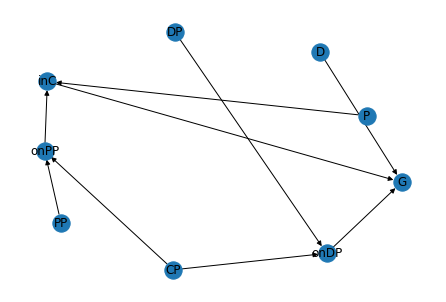

In [5]:
nx.draw(model, with_labels=True)
plt.show()

In [6]:
infer = VariableElimination(model)
g_dist = infer.query(['G', ], evidence={'D':0})
print(g_dist)

Finding Elimination Order: : 100%|██████████| 7/7 [00:00<00:00, 837.81it/s]

Eliminating: onPP: 100%|██████████| 7/7 [00:00<00:00, 168.47it/s]

+------+----------+
| G    |   phi(G) |
+======+==========+
| G(0) |   0.0008 |
+------+----------+
| G(1) |   0.9992 |
+------+----------+


In [7]:
inference = CausalInference(model)
bd_adj_sets = inference.get_all_backdoor_adjustment_sets("G", "P")
print(f"What's the possible backdoor adjustment sets? {bd_adj_sets}")
fd_adj_sets = inference.get_all_frontdoor_adjustment_sets("G", "P")
print(f"Ehat's the possible front adjustment sets? {fd_adj_sets}")

What's the possible backdoor adjustment sets? frozenset({frozenset({'onDP', 'inC'}), frozenset({'inC', 'CP'}), frozenset({'inC', 'onPP'})})
Ehat's the possible front adjustment sets? frozenset()


In [8]:
backdoor_adj = inference.simple_decision(bd_adj_sets)
backdoor_adj

frozenset({'inC', 'onDP'})

In [34]:
var = list(backdoor_adj)
var.append('G')
target = infer.query(var, evidence={'D':0})
adjustment = infer.query(list(backdoor_adj))
print(target)
print(adjustment)

Eliminating: CP: 100%|██████████| 5/5 [00:00<00:00, 385.16it/s]

Eliminating: CP: 100%|██████████| 7/7 [00:00<00:00, 656.43it/s]/s]

+--------+---------+------+-------------------+
| inC    | onDP    | G    |   phi(inC,onDP,G) |
+========+=========+======+===================+
| inC(0) | onDP(0) | G(0) |            0.0008 |
+--------+---------+------+-------------------+
| inC(0) | onDP(0) | G(1) |            0.0000 |
+--------+---------+------+-------------------+
| inC(0) | onDP(1) | G(0) |            0.0000 |
+--------+---------+------+-------------------+
| inC(0) | onDP(1) | G(1) |            0.0192 |
+--------+---------+------+-------------------+
| inC(1) | onDP(0) | G(0) |            0.0000 |
+--------+---------+------+-------------------+
| inC(1) | onDP(0) | G(1) |            0.0392 |
+--------+---------+------+-------------------+
| inC(1) | onDP(1) | G(0) |            0.0000 |
+--------+---------+------+-------------------+
| inC(1) | onDP(1) | G(1) |            0.9408 |
+--------+---------+------+-------------------+
+---------+--------+-----------------+
| onDP    | inC    |   phi(onDP,inC) |
+=========

In [37]:
adjusted = target.product(adjustment, inplace=False)
print(adjusted)
adjusted.normalize()
print(adjusted)
adjusted.marginalize(['inC', 'onDP'])
print(adjusted)

+--------+---------+------+-------------------+
| inC    | onDP    | G    |   phi(inC,onDP,G) |
+========+=========+======+===================+
| inC(0) | onDP(0) | G(0) |            0.0000 |
+--------+---------+------+-------------------+
| inC(0) | onDP(0) | G(1) |            0.0000 |
+--------+---------+------+-------------------+
| inC(0) | onDP(1) | G(0) |            0.0000 |
+--------+---------+------+-------------------+
| inC(0) | onDP(1) | G(1) |            0.0004 |
+--------+---------+------+-------------------+
| inC(1) | onDP(0) | G(0) |            0.0000 |
+--------+---------+------+-------------------+
| inC(1) | onDP(0) | G(1) |            0.0015 |
+--------+---------+------+-------------------+
| inC(1) | onDP(1) | G(0) |            0.0000 |
+--------+---------+------+-------------------+
| inC(1) | onDP(1) | G(1) |            0.8851 |
+--------+---------+------+-------------------+
+--------+---------+------+-------------------+
| inC    | onDP    | G    |   phi(inC,on